In [1]:
print(1)   # `conda install ipykernel` and it should work in VSCode after selecting correct python interpreter (one from conda env)

1


In [14]:
import matplotlib.pyplot as plt

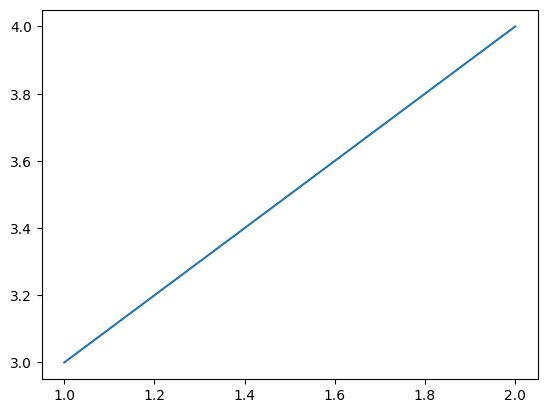

In [15]:
plt.plot([1,2],[3,4])
plt.show()

In [16]:
import torch

t = torch.zeros(1).cuda()
print(t.mean())

tensor(0., device='cuda:0')


In [17]:
import argparse
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
#import scipy.spatial.distance

import cpc.feature_loader as fl
import cpc.train as tr
from cpc.dataset import AudioBatchData, findAllSeqs, filterSeqs, parseSeqLabels




In [77]:

#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/timepred2-12v3cpcctc-0to50/checkp/checkpoint_50.pt"

#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/timepred2fixed-12cpcctcSimpleOnlyteachlast-0to50/checkp/checkpoint_50.pt"

#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/timepred2fixed-12cpcctcSimpleExp1StdevgradreweightedMasklengthsforlinsepDontshrinkenc-0to50/checkp/checkpoint_50.pt"

#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/timepred5-Doubleexp1Len03to07-0to50/checkp/checkpoint_50.pt"

# best PDACPC
CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/PDACPC-run94-fixedSeed-Norm01Len04to06with12PredictorsTUL-0to50/checkp/checkpoint_49.pt"
# and without seed:
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/PDACPC-run101-noseed1-fixedSeed-Norm01Len04to06with12PredictorsTUL-0to50/checkp/checkpoint_49.pt"
# other good run without seed, with doubleExp:
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/PDACPC-run80-NOfixedSeed2-DoubleExp075Len04to06with12predictors-0to50/checkp/checkpoint_49.pt"

#normals with a bigger len range (with a fixed seed):
# (without TUL):
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/PDACPC-run22-fixedSeed-Norm01Len03to07with12Predictors-0to50/checkp/checkpoint_49.pt"
# (with TUL):
# CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/PDACPC-run106-fixedSeed-Norm01Len03to07with12PredictorsTUL-0to50/checkp/checkpoint_49.pt"

# 1st random seed run best CP
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/centerpRandDS-encpushlin03-onlinekmb3500metric100kkmNormReweightSeparatelyNoreinit-0to50/checkp/checkpoint_49.pt"
# almost best CP cont with fixed seed (not best but same settings as above)
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/centerpRandDS-encpushlin03-onlinekmb3500metric100kkmNormReweightSeparatelyNoreinit-cont35to50/checkp/checkpoint_49.pt"

# baseline200
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/centerpRandDS-baseline-0_150contto200fixedSeed/checkp/checkpoint_199.pt"
# CP200
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/centerpRandDS-encpushlin03-onlinekmb3500metric100kkmNormReweightSeparatelyNoreinit-0to200fixedSeed_2/checkp/checkpoint_199.pt"

# baseline run 3 as run 1 has lacking data under paths after the disk failure and don;t want to change args file by hand if can just use run 3
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/PDACPC-run88-nofixedseed-baseline3/checkp/checkpoint_49.pt"
# and baseline with a ficed seed:
#CP = "/pio/gluster/i283340/cpcfcmtries/pushloss2/PDACPC-run89-fixedseed-baseline/checkp/checkpoint_49.pt"

imagePrefix = "normals04-06TUL"  # convenience to describe shorter and easier than full path what config is this

pathForImgName = CP.replace('/','_').replace('.','_')
print(pathForImgName)
imgSaveRoot = "/pio/gluster/i283340/imgs/"

_pio_gluster_i283340_cpcfcmtries_pushloss2_PDACPC-run94-fixedSeed-Norm01Len04to06with12PredictorsTUL-0to50_checkp_checkpoint_49_pt


In [79]:

cdata = fl.getCheckpointData(os.path.dirname(CP))
_, _, args, _ = cdata
#args.pathDB = ...
#args.pathTrain = ...
#args.pathVal = ...
#args.pathPhone = ...

print("args:", "\n".join([str(a)+": "+str(args.__dict__[a]) for a in sorted(args.__dict__)]))

seqNames, speakers = findAllSeqs(args.pathDB,
                                 extension=args.file_extension,
                                 loadCache=not args.ignore_cache)
phone_labels, n_phones = parseSeqLabels(args.path_phone_data)

seq_val = filterSeqs(args.pathVal, seqNames)[:10]
db_val = AudioBatchData(args.pathDB, args.sizeWindow, seq_val,
                        (phone_labels, n_phones), len(speakers))

if args.modSettings:
    if args.modelLengthInARpredStartDep or args.modelLengthInARpredEndDep:
        modelLengthInARpredDep = args.nPredicts
    else:
        modelLengthInARpredDep = None
    modSettings = {
        "modDebug": args.debug,
        "numProtos": args.modProtos, 
        "pushLossWeightEnc": args.modPushLossWeightEnc,
        "pushLossWeightCtx": args.modPushLossWeightCtx,
        "VQpushEncCenterWeightOnTopConv": args.modVQpushEncCenterWeightOnTopConv,
        "VQpushEncCenterWeightOnlyAR": args.modVQpushEncCenterWeightOnlyAR,
        "VQpushEncCenterWeightOnlyCriterion": args.modVQpushEncCenterWeightOnlyCriterion,
        "VQgradualStart": args.modVQgradualStart,
        "VQpushCtxCenterWeight": args.modVQpushCtxCenterWeight,
        "pushLossLinear": args.modPushLossLinear,
        "pushLossGradualStart": args.modPushLossGradualStart,
        "pushLossProtosMult": args.modPushLossProtosMult,
        "pushLossCenterNorm": args.modPushLossCenterNorm,
        "pushLossPointNorm": args.modPushLossPointNorm,
        "pushLossNormReweight": args.modPushLossNormReweight,
        "pushLossReweightPointsSeparately": args.modPushLossReweightPointsSeparately,
        "hierARshorten": args.modHierARshorten,
        "hierARgradualStart": args.modHierARgradualStart,
        "hierARmergePrior": args.modHierARmergePrior,
        "modelLengthInARsimple": args.modelLengthInARsimple,
        "modelLengthInARconv": args.modelLengthInARconv,
        "modelLengthInARpredDep": modelLengthInARpredDep,
        "showLengthsInCtx": args.linsepShowARlengthsInCtx,
        "shrinkEncodingsLengthDims": args.shrinkEncodingsLengthDims
    }  
else:
    modSettings = None

cpcModel, args.hiddenGar, args.hiddenEncoder = fl.loadModel([CP], args.batchSizeGPU, modSettings=modSettings)
assert args.speakerEmbedding == 0
CPChiddenGar, CPChiddenEncoder = args.hiddenGar, args.hiddenEncoder


cpcCriterion = tr.loadCriterion(CP, cpcModel.gEncoder.DOWNSAMPLING, len(speakers), n_phones)



cpcCriterion.cuda()
cpcModel.cuda()










args: ARinputDim: 256
ARlengthFirstPredID: False
ARlengthPredNoise: None
ARlengthsGradReweight: None
ARmap01rangeMax: 0.6
ARmap01rangeMin: 0.4
ARmodelFrameNormalsDistMult: 1.0
ARmodelFrameNormalsSigma: 0.1
ARteachLongPredsSqrtLess: False
ARteachLongPredsUniformlyLess: True
ARteachOnlyLastFrameLength: False
CPCCTC: True
CPCCTCLearnBlank: False
CPCCTCLossTemp: 1.0
CPCCTCMasq: 
CPCCTCNoNegsMatchWin: False
CPCCTCNormalizeEncs: False
CPCCTCNormalizePreds: False
CPCCTCNumMatched: 12
CPCCTCSelfLoop: False
CPCCTCSkipBeg: 0
CPCCTCSkipEnd: 0
CTC: False
CTCphones: False
abspos: False
arMode: LSTM
batchSizeGPU: 32
beta1: 0.9
beta2: 0.999
captureCPCCTCalign: False
captureCPCCTClogScores: False
captureConvRepr: False
captureCtxRepr: False
captureDSfreq: None
captureDStotNr: None
captureEachEpochs: 10
captureEverything: False
capturePhoneAlign: False
capturePred: False
captureSetStats: None
captureSpeakerAlign: False
cpc_mode: None
debug: False
dropout: True
encoderNoLastRelu: False
encoder_type: cpc

10it [00:00, 283398.92it/s]

Done, elapsed: 0.008 seconds
Scanned 10 sequences in 0.01 seconds
1 chunks computed


Joining pool
Joined process, elapsed=0.056 secs
Loading checkpoint /pio/gluster/i283340/cpcfcmtries/pushloss2/PDACPC-run94-fixedSeed-Norm01Len04to06with12PredictorsTUL-0to50/checkp/checkpoint_49.pt
LocArgs: Namespace(ARinputDim=256, ARlengthFirstPredID=False, ARlengthPredNoise=None, ARlengthsGradReweight=None, ARmap01rangeMax=0.6, ARmap01rangeMin=0.4, ARmodelFrameNormalsDistMult=1.0, ARmodelFrameNormalsSigma=0.1, ARteachLongPredsSqrtLess=False, ARteachLongPredsUniformlyLess=True, ARteachOnlyLastFrameLength=False, CPCCTC=True, CPCCTCLearnBlank=False, CPCCTCLossTemp=1.0, CPCCTCMasq='', CPCCTCNoNegsMatchWin=False, CPCCTCNormalizeEncs=False, CPCCTCNormalizePreds=False, CPCCTCNumMatched=12, CPCCTCSelfLoop=False, CPCCTCSkipBeg=0, CPCCTCSkipEnd=0, CTC=False, CTCphones=False, abspos=False, arMode='LSTM', batchSizeGPU=32, beta1=0.9, beta2=0.999, captureCPCCTCalign=False, captureCPCCTClogScores=False, captureConvRepr=False, captureCtxRepr=False, captureDSfreq=None, captureDStotNr=None, captureEa

CPCModel(
  (gEncoder): CPCEncoder(
    (conv0): Conv1d(1, 256, kernel_size=(10,), stride=(5,), padding=(3,))
    (batchNorm0): ChannelNorm()
    (conv1): Conv1d(256, 256, kernel_size=(8,), stride=(4,), padding=(2,))
    (batchNorm1): ChannelNorm()
    (conv2): Conv1d(256, 256, kernel_size=(4,), stride=(2,), padding=(1,))
    (batchNorm2): ChannelNorm()
    (conv3): Conv1d(256, 256, kernel_size=(4,), stride=(2,), padding=(1,))
    (batchNorm3): ChannelNorm()
    (conv4): Conv1d(256, 256, kernel_size=(4,), stride=(2,), padding=(1,))
    (batchNorm4): ChannelNorm()
  )
  (gAR): CPCAR(
    (baseNet): LSTM(256, 256, num_layers=2, batch_first=True)
  )
)

In [80]:
val_loader = db_val.getDataLoader(8, 'sequential', False, numWorkers=0)  # 8  16
data_iter = iter(val_loader)
batchData, labelData = next(data_iter)
label = labelData['speaker'].cuda()
labelPhone = labelData['phone'].cuda()
batchData = batchData.cuda()
c_feature, predLengths, encoded_data, pure_enc, label, labelPhoneByGPU, pushLoss, segmSetTens, _, _ = \
    cpcModel(batchData, label, labelPhone, None, None, (50,50), False, False)


            



In [81]:
# only run if PDACPC checkpoint

# [!!!] predLengths here is before the mapping
if args.modelLengthInARconv:
    predLengths = torch.sigmoid(predLengths) * (args.ARmap01rangeMax - args.ARmap01rangeMin) + args.ARmap01rangeMin
else:
    predLengths = ((predLengths + 1.) / 2.) * (args.ARmap01rangeMax - args.ARmap01rangeMin) + args.ARmap01rangeMin

torch.Size([8, 1, 20480]) torch.Size([8, 128, 256])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29, 29, 29,
        29, 29], device='cuda:0')
tensor([0.5092, 0.4512, 0.4188, 0.4073, 0.4100, 0.4085, 0.4019, 0.4061, 0.4185,
        0.4239, 0.4791, 0.4544, 0.4274, 0.4263, 0.4110, 0.4042, 0.4014, 0.4016,
        0.4440, 0.5602, 0.5890, 0.5942, 0.5934, 0.5962, 0.5983, 0.5977, 0.5990,
        0.5988, 0.5821, 0.4898, 0.4233, 0.4041, 0.4010, 0.4007, 0.4003, 0.4001,
        0.4000, 0.4001, 0.4002, 0.4075, 0.4578, 0.5005, 0.5023, 0.4472, 0.4270,
        0.4542, 0.5290, 0.5526, 0.5828, 0.5829, 0.5897, 0.5953, 0.5981, 0.5957,
        0.5467, 0.4869, 0.4751, 0.5561, 0.5672, 0.5886, 0.5352, 0.5381, 0.5809,
        0.5905, 0.5803, 0.5357, 0.4491, 0.4136, 0.4128, 0.4089, 0.4021, 0.4005,
        0.4001, 0.4001, 0.4002, 0.4000, 0.4000, 0.4000, 0.4004, 0.4011, 0.4997,
        0.5731, 0.5900, 0.5863, 0.5607, 0.4779, 0.4991, 0.5423, 0.5532, 0.5395,
        0.4570, 0.4658, 0.4656, 0.

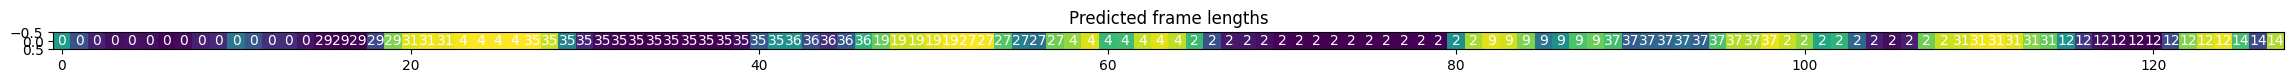

0: min 0.40000224113464355, max 0.5990323424339294
[(3, '0.53'), (3, '0.45'), (3, '0.43'), (3, '0.41'), (3, '0.54'), (3, '0.58'), (27, '0.59'), (27, '0.59'), (27, '0.54'), (27, '0.44'), (27, '0.41'), (27, '0.42'), (27, '0.53'), (27, '0.47'), (27, '0.56'), (27, '0.51'), (4, '0.51'), (4, '0.53'), (4, '0.58'), (4, '0.59'), (4, '0.58'), (4, '0.52'), (4, '0.46'), (4, '0.48'), (0, '0.56'), (0, '0.56'), (0, '0.45'), (0, '0.42'), (0, '0.41'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.40'), (0, '0.41'), (0, '0.43'), (0, '0.51'), (0, '0.54'), (0, '0.48'), (0, '0.43'), (35, '0.43'), (35, '0.41'), (35, '0.40'), (35, '0.47'), (35, '0.54'), (35, '0.45'), (35, '0.43'), (35, '0.41'), (35, '0.40'), (35, '0.46'), (35, '0.50'), (35, '0.52'), (36, '0.57'), (36, '0.53'), (36, '0.54'), (36, '0.56'), (19, '0.48'), (19, '0.44'), (19, '0.43'), (19, '0.42'), (4, '0.41'), (4, '0.57'), (4, '0.59'), (4, '0.60'), (4, '0.6

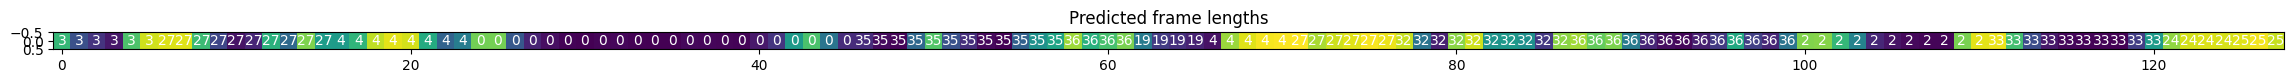

1: min 0.4004923701286316, max 0.5979940295219421
[(19, '0.53'), (35, '0.44'), (35, '0.41'), (35, '0.41'), (39, '0.40'), (39, '0.40'), (39, '0.40'), (39, '0.40'), (39, '0.40'), (39, '0.40'), (39, '0.43'), (39, '0.53'), (35, '0.55'), (35, '0.53'), (35, '0.50'), (35, '0.45'), (35, '0.43'), (35, '0.43'), (35, '0.55'), (35, '0.57'), (35, '0.55'), (36, '0.57'), (36, '0.54'), (36, '0.47'), (36, '0.56'), (36, '0.58'), (36, '0.59'), (19, '0.59'), (19, '0.57'), (19, '0.46'), (19, '0.42'), (19, '0.43'), (19, '0.41'), (19, '0.40'), (29, '0.40'), (29, '0.54'), (29, '0.58'), (31, '0.58'), (31, '0.56'), (31, '0.58'), (31, '0.60'), (31, '0.60'), (15, '0.60'), (15, '0.59'), (15, '0.54'), (15, '0.44'), (15, '0.41'), (15, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.41'), (15, '0.51'), (31, '0.58'), (31, '0.59'), (31, '0.59'), (31, '0.59'), (31, '0.59'), (31, '0.60'), (31, '0.60'), (31, '0.59'), (21, '0.58'), (21, '0.50'), (21, '0.43'

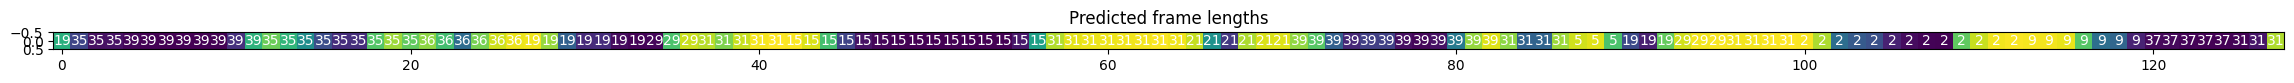

2: min 0.4000025689601898, max 0.5989234447479248
[(8, '0.56'), (8, '0.52'), (8, '0.56'), (8, '0.48'), (8, '0.44'), (25, '0.45'), (25, '0.42'), (25, '0.41'), (25, '0.40'), (25, '0.40'), (25, '0.41'), (25, '0.40'), (25, '0.40'), (25, '0.40'), (25, '0.48'), (25, '0.50'), (25, '0.44'), (25, '0.41'), (25, '0.40'), (25, '0.40'), (25, '0.40'), (25, '0.40'), (25, '0.40'), (25, '0.41'), (25, '0.56'), (24, '0.55'), (24, '0.48'), (24, '0.57'), (24, '0.56'), (24, '0.47'), (24, '0.43'), (8, '0.41'), (8, '0.40'), (8, '0.54'), (8, '0.57'), (31, '0.58'), (31, '0.59'), (31, '0.59'), (31, '0.51'), (31, '0.43'), (31, '0.41'), (31, '0.53'), (5, '0.58'), (5, '0.59'), (5, '0.55'), (5, '0.45'), (5, '0.41'), (5, '0.40'), (5, '0.40'), (5, '0.40'), (5, '0.40'), (19, '0.40'), (19, '0.40'), (19, '0.40'), (19, '0.48'), (19, '0.43'), (19, '0.42'), (12, '0.41'), (12, '0.41'), (12, '0.41'), (12, '0.55'), (12, '0.57'), (12, '0.52'), (12, '0.52'), (12, '0.57'), (12, '0.59'), (31, '0.54'), (31, '0.58'), (31, '0.58'), (

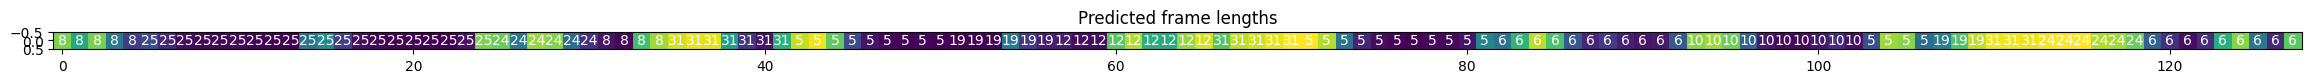

3: min 0.4000980257987976, max 0.5973821878433228
[(2, '0.54'), (2, '0.54'), (9, '0.59'), (9, '0.58'), (9, '0.59'), (9, '0.58'), (9, '0.50'), (9, '0.44'), (9, '0.41'), (9, '0.40'), (9, '0.41'), (9, '0.41'), (9, '0.41'), (9, '0.57'), (9, '0.59'), (28, '0.59'), (28, '0.53'), (28, '0.45'), (28, '0.41'), (28, '0.40'), (28, '0.53'), (28, '0.57'), (28, '0.57'), (28, '0.55'), (36, '0.48'), (36, '0.45'), (36, '0.42'), (36, '0.40'), (36, '0.53'), (36, '0.58'), (36, '0.59'), (36, '0.60'), (36, '0.59'), (38, '0.58'), (38, '0.59'), (38, '0.56'), (38, '0.45'), (38, '0.48'), (38, '0.55'), (38, '0.55'), (7, '0.48'), (7, '0.57'), (7, '0.59'), (7, '0.59'), (7, '0.56'), (3, '0.46'), (3, '0.41'), (3, '0.40'), (3, '0.40'), (3, '0.40'), (3, '0.50'), (3, '0.58'), (2, '0.59'), (2, '0.58'), (2, '0.53'), (2, '0.45'), (2, '0.44'), (2, '0.57'), (4, '0.47'), (4, '0.57'), (4, '0.59'), (4, '0.59'), (4, '0.60'), (26, '0.60'), (26, '0.59'), (26, '0.57'), (26, '0.48'), (26, '0.47'), (37, '0.57'), (37, '0.58'), (37, '0

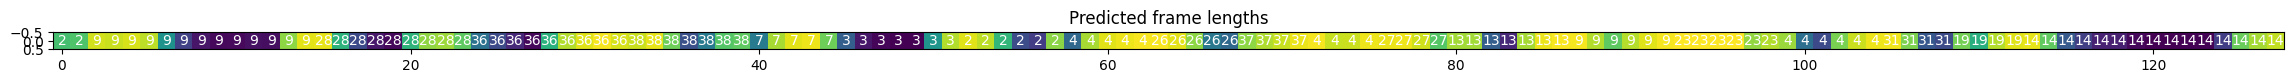

4: min 0.4003681242465973, max 0.5995784401893616
[(36, '0.52'), (36, '0.44'), (36, '0.54'), (36, '0.45'), (36, '0.41'), (36, '0.41'), (36, '0.57'), (36, '0.59'), (4, '0.60'), (4, '0.60'), (4, '0.60'), (4, '0.60'), (4, '0.59'), (31, '0.56'), (31, '0.50'), (31, '0.57'), (31, '0.59'), (31, '0.60'), (4, '0.58'), (4, '0.50'), (4, '0.43'), (4, '0.41'), (4, '0.52'), (4, '0.46'), (4, '0.55'), (4, '0.48'), (4, '0.54'), (4, '0.55'), (3, '0.52'), (3, '0.45'), (3, '0.57'), (3, '0.49'), (3, '0.42'), (3, '0.41'), (3, '0.40'), (3, '0.40'), (3, '0.42'), (3, '0.53'), (19, '0.57'), (19, '0.49'), (19, '0.43'), (4, '0.42'), (4, '0.53'), (4, '0.58'), (4, '0.56'), (4, '0.58'), (27, '0.57'), (27, '0.47'), (27, '0.55'), (27, '0.54'), (27, '0.49'), (27, '0.46'), (27, '0.43'), (29, '0.57'), (29, '0.59'), (29, '0.59'), (27, '0.55'), (27, '0.57'), (27, '0.59'), (27, '0.59'), (2, '0.60'), (2, '0.59'), (2, '0.57'), (2, '0.45'), (2, '0.44'), (2, '0.44'), (2, '0.52'), (2, '0.56'), (2, '0.58'), (31, '0.60'), (31, '0.

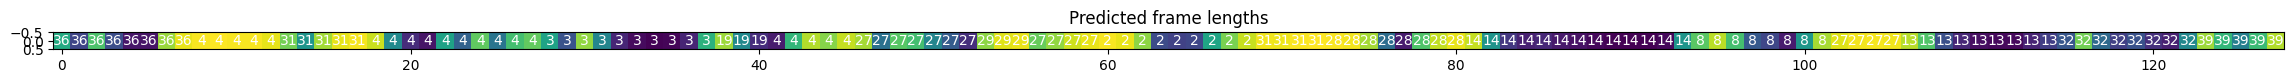

5: min 0.4003217816352844, max 0.5991926193237305
[(7, '0.54'), (7, '0.47'), (7, '0.42'), (7, '0.41'), (7, '0.40'), (7, '0.42'), (7, '0.52'), (7, '0.58'), (7, '0.59'), (3, '0.58'), (3, '0.58'), (3, '0.59'), (3, '0.59'), (3, '0.58'), (28, '0.54'), (28, '0.46'), (28, '0.42'), (28, '0.41'), (28, '0.57'), (28, '0.59'), (39, '0.60'), (39, '0.59'), (39, '0.55'), (39, '0.46'), (39, '0.42'), (39, '0.55'), (4, '0.58'), (4, '0.59'), (4, '0.60'), (4, '0.59'), (4, '0.60'), (4, '0.60'), (26, '0.60'), (26, '0.60'), (26, '0.60'), (26, '0.60'), (26, '0.56'), (26, '0.48'), (5, '0.57'), (5, '0.59'), (5, '0.60'), (5, '0.58'), (5, '0.51'), (29, '0.57'), (29, '0.59'), (29, '0.60'), (31, '0.57'), (31, '0.59'), (31, '0.53'), (31, '0.44'), (31, '0.42'), (31, '0.41'), (37, '0.40'), (37, '0.40'), (37, '0.41'), (37, '0.51'), (37, '0.58'), (37, '0.56'), (37, '0.49'), (37, '0.53'), (33, '0.44'), (33, '0.42'), (33, '0.52'), (33, '0.45'), (33, '0.41'), (33, '0.40'), (33, '0.40'), (33, '0.40'), (33, '0.40'), (33, '0.

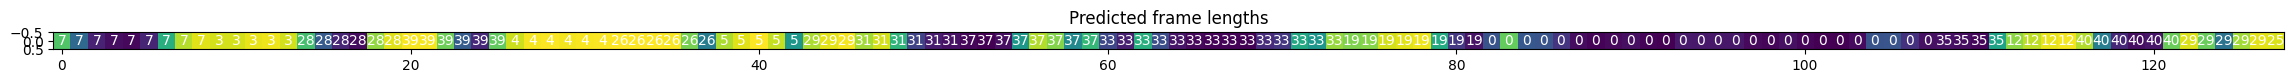

6: min 0.40051162242889404, max 0.5976179242134094
[(40, '0.53'), (40, '0.48'), (40, '0.57'), (5, '0.59'), (5, '0.59'), (5, '0.59'), (5, '0.58'), (35, '0.59'), (35, '0.59'), (35, '0.55'), (35, '0.45'), (35, '0.46'), (35, '0.51'), (39, '0.52'), (39, '0.44'), (39, '0.45'), (39, '0.53'), (39, '0.56'), (39, '0.56'), (39, '0.57'), (37, '0.56'), (37, '0.46'), (37, '0.42'), (37, '0.54'), (37, '0.58'), (37, '0.59'), (37, '0.59'), (37, '0.59'), (39, '0.55'), (39, '0.45'), (39, '0.46'), (39, '0.42'), (39, '0.56'), (39, '0.59'), (39, '0.56'), (16, '0.47'), (16, '0.56'), (16, '0.58'), (16, '0.58'), (16, '0.50'), (16, '0.43'), (16, '0.41'), (16, '0.44'), (4, '0.51'), (4, '0.54'), (4, '0.54'), (4, '0.46'), (4, '0.54'), (4, '0.45'), (4, '0.45'), (4, '0.41'), (4, '0.41'), (4, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.40'), (15, '0.43'), (37, '0.54'), (37, '0.58'), (37, '0.58'), (37, '0.58'), (37, '0.53'), (10, '0.54'), (10, '0.54'), (10, '0.53'), (10, '0.44'), (10, '0.41'), (10, '0.41

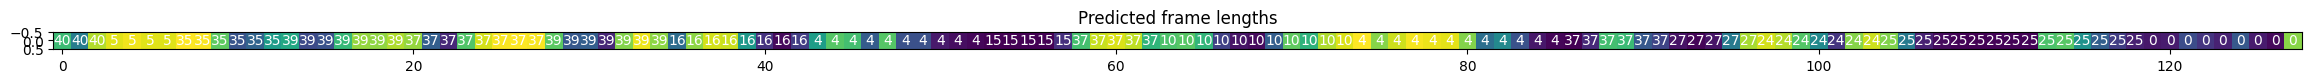

7: min 0.4001184105873108, max 0.5942456126213074
(8, 128) (8, 128)
8 128


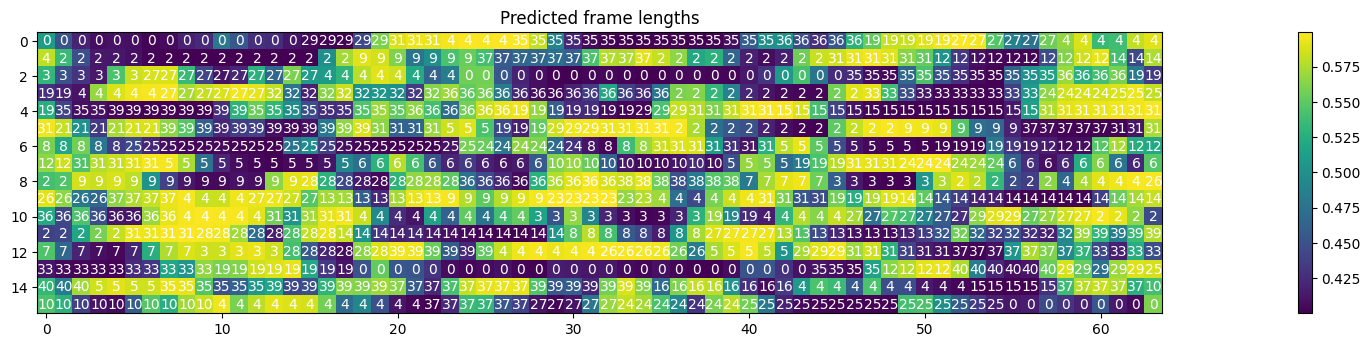

/pio/gluster/i283340/imgs/lengths__normals04-06TUL___pio_gluster_i283340_cpcfcmtries_pushloss2_PDACPC-run94-fixedSeed-Norm01Len04to06with12PredictorsTUL-0to50_checkp_checkpoint_49_pt.png


In [82]:
# only run if PDACPC checkpoint

def f(tens):
    return tens.item()
def ff(tens):
    return "%.2f" % tens.item()

print(batchData.shape, c_feature.shape)
print(labelPhone[0,:20])
print(predLengths[0,:150])  #,-1])
lengths = predLengths
for i in range(c_feature.shape[0]):
    print(list(zip(list(map(f, labelPhone[i,:])), list(map(ff,lengths[i])))))

    imgLabels = np.array(list(map(f, labelPhone[i,:])))[np.newaxis,:]
    imgColorData = np.array(lengths[i].cpu().detach())[np.newaxis,:]

    fig, ax = plt.subplots()
    im = ax.imshow(imgColorData)

    for j in range(len(imgColorData[0])):
        text = ax.text(j, 0, imgLabels[0,j],
                       ha="center", va="center", color="w")

    ax.set_title("Predicted frame lengths")
    fig.tight_layout()
    fig.set_size_inches(25.5, 4)
    plt.show()

    print(f"{i}: min {lengths[i].min().item()}, max {lengths[i].max().item()}")


imgLabels = np.array([list(map(f, labelPhone[i,:])) for i in range(lengths.shape[0])])
imgColorData = np.array(lengths.cpu().detach())
print(imgLabels.shape, imgColorData.shape)

features = encoded_data
fd0 = features[:,1:,:] - features[:,:-1,:]
frameDiffs = torch.sqrt(torch.clamp(fd0*fd0, min=0).sum(dim=-1))

halfLines = True  # [!] works only without compareLenWithFrameDiff
compareLenWithFrameDiff = False

if halfLines:
    s0, s1 = imgColorData.shape
    print(s0, s1)
    imgColorData = imgColorData.reshape(s0*2, s1//2)
    imgLabels = imgLabels.reshape(s0*2, s1//2)

if compareLenWithFrameDiff:

    from numpy.ma import masked_array

    imgData = np.zeros((imgColorData.shape[0]*3, imgColorData.shape[1]))

    imgData[::3] = -1000
    imgData1 = masked_array(imgData,imgData>-999)
    imgData[::3] = imgColorData


    imgData[1::3] = -1000
    imgData2 = masked_array(imgData,imgData>-999)
    imgData[1::3, 1:-2] = frameDiffs[:,1:-1].detach().cpu().numpy()
    imgData[1::3, -2:] = 0 
    imgData[1::3, 0] = 0

    imgData[2::3] = -1000
    imgData3 = masked_array(imgData,imgData>-999)
    imgData[2::3] = 0.



    from matplotlib import cm
    fig, ax = plt.subplots()
    im1 = ax.imshow(imgData1, interpolation='nearest', cmap=cm.viridis)
    im2 = ax.imshow(imgData2, interpolation='nearest', cmap=cm.viridis)
    im3 = ax.imshow(imgData3, interpolation='nearest', cmap=cm.winter)

    for i in range(len(imgColorData)):
        for j in range(len(imgColorData[0])):
            text = ax.text(j, 3*i, imgLabels[i,j],
                            ha="center", va="center", color="w")

else:
    imgData = imgColorData
    from matplotlib import cm
    fig, ax = plt.subplots()
    im1 = ax.imshow(imgData, interpolation='nearest', cmap=cm.viridis)
    for i in range(len(imgColorData)):
        for j in range(len(imgColorData[0])):
            text = ax.text(j, i, imgLabels[i,j],
                            ha="center", va="center", color="w")

ax.set_title("Predicted frame lengths")
fig.tight_layout()
plt.colorbar(im1)
if compareLenWithFrameDiff:
    plt.colorbar(im2)
    fig.set_size_inches(35.5, 9)
else:
    if halfLines:
        fig.set_size_inches(30, 3)
    else:
        fig.set_size_inches(30, 4)
plt.show()
lengthsImgSavePath = imgSaveRoot + "lengths__" + imagePrefix + "__" + pathForImgName + ".png"
print(lengthsImgSavePath)
fig.savefig(lengthsImgSavePath)

In [83]:
# only run if PDACPC checkpoint

for p in range(40):
    print(p, list(map(ff, lengths[labelPhone==p])))

0 ['0.51', '0.45', '0.42', '0.41', '0.41', '0.41', '0.40', '0.41', '0.42', '0.42', '0.48', '0.45', '0.43', '0.43', '0.41', '0.56', '0.56', '0.45', '0.42', '0.41', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.41', '0.43', '0.51', '0.54', '0.48', '0.43', '0.45', '0.55', '0.45', '0.45', '0.43', '0.41', '0.40', '0.41', '0.41', '0.40', '0.40', '0.42', '0.41', '0.41', '0.41', '0.41', '0.40', '0.41', '0.40', '0.40', '0.40', '0.41', '0.45', '0.45', '0.43', '0.41', '0.41', '0.41', '0.45', '0.43', '0.42', '0.45', '0.41', '0.41', '0.56']
1 []
2 ['0.54', '0.45', '0.41', '0.41', '0.41', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.40', '0.50', '0.57', '0.58', '0.57', '0.52', '0.53', '0.47', '0.42', '0.41', '0.42', '0.56', '0.58', '0.56', '0.56', '0.53', '0.49', '0.42', '0.41', '0.41', '0.40', '0.40', '0.56', '0.59', '0.60', '0.57', '0.47', '0.46', '0.45', '0.42', '0.41', '0.40', '0.40', '0.55', '0.58', '0.60', '0.60', '0.54

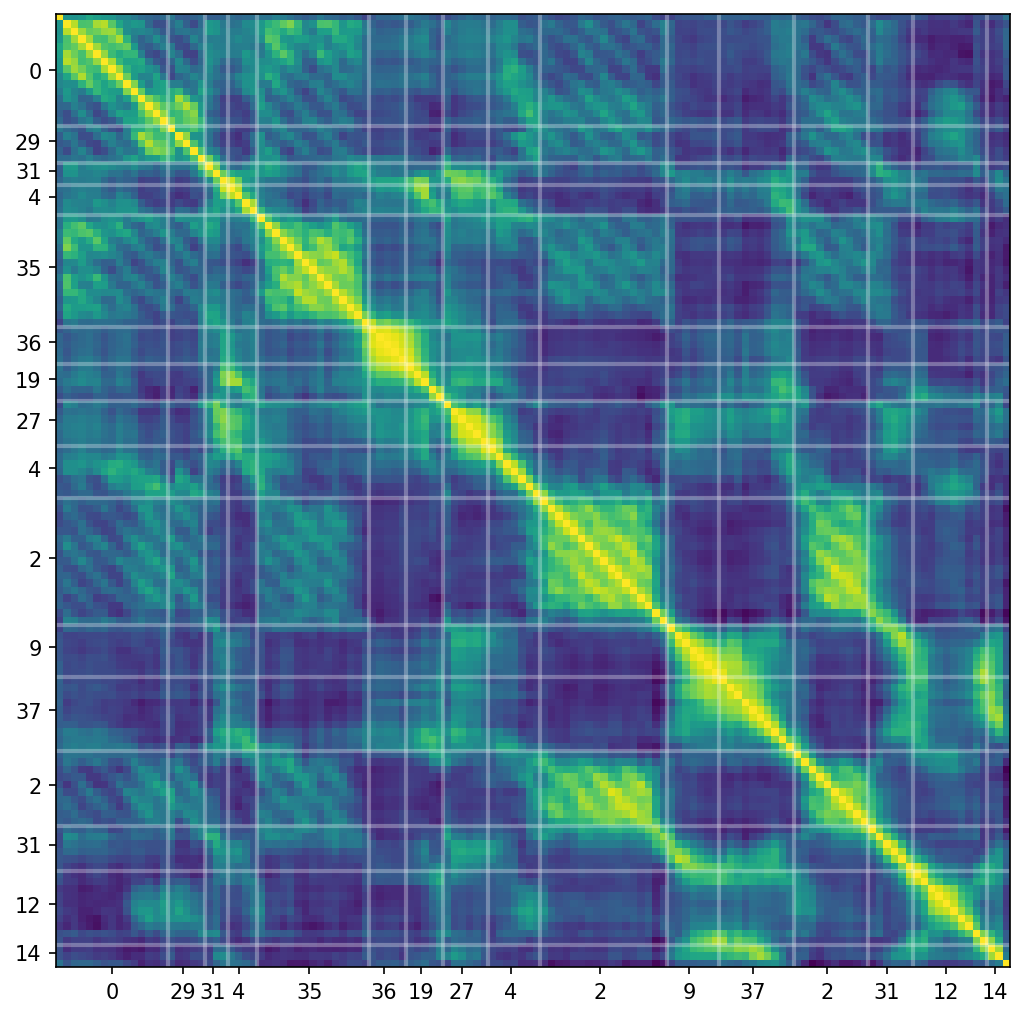

/pio/gluster/i283340/imgs/sims_encoded_data__normals04-06TUL___pio_gluster_i283340_cpcfcmtries_pushloss2_PDACPC-run94-fixedSeed-Norm01Len04to06with12PredictorsTUL-0to50_checkp_checkpoint_49_pt.png


In [84]:

features = encoded_data  #encoded_data  # c_feature
simsType = "encoded_data"

fig = plt.figure(figsize=(7, 7), dpi=150)
phones = labelPhone[0,].cpu().numpy()  #label['phone'][0,].numpy()

enc = features[0, :, :].detach().cpu().numpy()
enc /= np.sqrt((enc**2).sum(1, keepdims=True))
sims = (enc @ enc.T) / enc.shape[-1]

plt.imshow(sims)
for boundary in np.where(np.diff(phones))[0] + 0.5:
    plt.axhline(boundary, color='w', linewidth=2, alpha=0.3)
    plt.axvline(boundary, color='w', linewidth=2, alpha=0.3)
#plt.colorbar()
plt.tight_layout()
# plt.axis('off')
bars = np.concatenate([[0], np.where(np.diff(phones))[0], [sims.shape[1]-1]])
phone_locs = (bars[:-1] + bars[1:]) / 2
_ = plt.xticks(phone_locs, [str(p) for p in phones[bars[1:]]])
_ = plt.yticks(phone_locs, [str(p) for p in phones[bars[1:]]])

plt.imshow(sims)
plt.show()
simsImgSavePath = imgSaveRoot + "sims_" + simsType + "__" + imagePrefix + "__" + pathForImgName + ".png"
print(simsImgSavePath)
fig.savefig(simsImgSavePath)
